#### Para compreendermos melhor as ideias básicas do ML(Aprendizado de Máquina) vamos contar um pouco sobre sua aplicabilidade e métodos

##### Temos dois tipos de Aprendizado de Máquina:

- Aprendizado supervisionado, onde **temos um rótulo ou target** que passamos ao modelo para servir de previsão

- Aprendizado não supervisionado, **onde não há dados de rótulo ou target**

#### Alguns obstáculos comuns em Aprendizado de Máquina

- Overfitting -> corrigido dando-se pesos (regularizações, ou alterando-se hiperparâmetros para mais simples), penalizando o modelo ou tratando outliers (possíveis causadores) - Simplifique o modelo

- Underfitting -> Escolha outro modelo ou acrescente mais hiperparâmetros ao atual

- Amostra treino com baixa representabilidade -> certifique-se que sua amostragem é representativa da população (pode-se usar testes estatísticos e até métodos de amostragem estratificada para variáveis categóricas ou ordinais)

- Ruídos, NaN ou outliers -> todos podem impactar negativamento o algoritmo

- Escalas diferentes e distribuições não Gaussinas em alguns modelos -> alguns modelos como o Linear Regression, se beneficiam de escalas entre features e target iguais e distribuições normais dos dados

- Seleção de Features </br>
  
  </br>

|Problema|Possível Solução|
|:--:|:--:|
|Overfitting|Penalização, Cross-valid, Trade-off Viés Variãncia|
|Underfitting|Aumentar Complexidade, Escolher outro Algoritmo|
|Amostra de Baixa Representatividade|Amostra Estratificada, mais dados|
|Ruídos| Pre-processing|
|Escalas e Distribuições não normais (para alguns modelos)|Métodos de Escalonamento e Centralização|
|Features sem importância|Seleção de Features e Redução de Dimensionalidade|

***Uma rápida explicação: modelos com features ruins ou com uma grande variadade tendem a performar mal ou causar overfitting, para selecionar boas features temos algumas opções. Não só conhecimento de negócio pode ser considerada como podemos aplicar testes t e f entre a feature com a variável resposta (target), caso as diferenças médias sejam significativas, temos uma boa feature. Também vale a pena, *para modelos lineares*, ter features com boas correlações. Outras formas são usando algoritmos como PCA para redução de dimensionalidade como veremos mais ao final do projeto***

# Train Test Split
 O primeiro passo, antes de qualquer aplicação, será dividir seus dados em dados de treino e teste afim de poder verificar a capacidade de generalização dos seus dados, visto que modelos comumente são importantes para prever resultados futuros, ou seja, é necessário ser um bom generalizador

In [6]:
#O primeiro passo é sempre seccionar seus dados em dados de treinamento e teste

#podemos fazer isso com train_test_split do sklearn ou StratifiedShuffleSplit

import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42) #aqui criamos algumas matrizes X e vetores Y onde 33% dos dados originais serão treino e o restante teste

#Pela facilidade, o train_test_split pode ser preferível, porém é mais aplicado quando a quantidade de dados (instâncias) for grande o suficiente para não ter viés
# de amostragem e acabar treinando um modelo com dados não representativos 


In [7]:
#Quando temos alguma variável importante e/ou precisamos ter certeza de que os dados seguem uma distribuição proporcional de variáveis usando o método de amostragem
# estratificada
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
X = df.drop('target', axis=1)
y = df['target']

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Combinar as features e o target para obter os DataFrames finais de treino e teste
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Imput Missing Values - Univariate and Bivariated

Dados do mundo real constantemente apresentam NaN, missing values ou até dados errados como alturas negativas</br>
Esses dados podem causar performances ruins ou abaixo de algoritmos, portanto é necessário preenchê-los</br>

**O Sklearn nos auxilia com o SimpleImputer ou KNNImputer**

O primeiro é um processo Univariado com SimpleImputer, onde o hiperparâmetro missing_values pode ser np.nan (default), algum valor específico ou np.inf e o hiperparâmetro strategy que pode ser mean (default), median, most_frequent e constant (nesse caso é preciso definir o valor no hiperparâmetro fill_value)</br>

```python
class sklearn.impute.SimpleImputer(
    *, missing_values=nan, strategy='mean', 
    fill_value=None, copy=True, add_indicator=False, 
    keep_empty_features=False
    )
```

Outro método, KNNImputer, já inputa valores conforme seus vizinhos próximos</br>
O importante nesse caso é escolher uma boa n_neighbors e qual distância usar. Caso a distribuição de seus dados não possuem muitos outliers ou é uma distribuição homogênca, é comum usar valores maiores de n_neighbors. Já o contrário, é indicado valores menores para que os outliers não interfiram tanto. Agora, a distância é definida para euclidiana quando os dados são contínuos sua aplicabilidade é melhor e é menos robusta a outliers. Já a distância de manhattan é útil quando os dados possuem mais outliers e também é melhor aplicável quando dados são discretos e/ou séries temporais

```python

from sklearn.impute import SimpleImputer
KNNImputer(
    *, missing_values=nan, n_neighbors=5, weights='uniform',
     metric='nan_euclidean', copy=True, add_indicator=False, 
     keep_empty_features=False
    )

```

In [8]:
from sklearn.impute import SimpleImputer
data = {
    'feature1': [7, 4, 10],
    'feature2': [2, np.nan, 5],
    'feature3': [3, 6, 9]
}
df = pd.DataFrame(data)


imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') #strategy pode ser mean, median, most_frequent e constant (mas nesse caso chamamos o hiperparametro 
#fill_value = )

imp_mean.fit_transform(df) #faz o fit e o transform ao mesmo tempo

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])

In [9]:
from sklearn.impute import KNNImputer

data = {
    'feature1': [7, 4, 10, np.nan],
    'feature2': [2, np.nan, 5, 4],
    'feature3': [3, 6, 9, 8]
}
df = pd.DataFrame(data)

imputer = KNNImputer(n_neighbors=2)

imputer.fit_transform(df)

# As implicações do KNNImputer:
# Custo computacional
# Útil quando as variáveis são correlacionadas

#Use GridSearch para usar o melhor valor para n_neighbors visto que esse param altera significativamente o modelo

array([[ 7.,  2.,  3.],
       [ 4.,  3.,  6.],
       [10.,  5.,  9.],
       [ 7.,  4.,  8.]])

# Manipulando dados Categóricos 
Modelos de AM não lidam bem com dados em texto ou categóricos, nesses casos, caso a variável tenha implicações importantes, fazemos sua transformação para dados
numéricos ou dummy

```python	
sklearn.preprocessing.OrdinalEncoder(
    *, categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', 
    unknown_value=None, encoded_missing_value=nan,
     min_frequency=None, max_categories=None
    )
```

OrdinalEncoder

Como Funciona:

- O OrdinalEncoder transforma variáveis categóricas em valores numéricos inteiros.

- Cada categoria em uma coluna é substituída por um número inteiro.

- A ordem dos números inteiros pode ser definida pelo usuário ou determinada automaticamente pela ordem das categorias encontradas nos dados.

In [10]:
from sklearn.preprocessing import OrdinalEncoder
categories = [['Male','Female','Binary']]
enc = OrdinalEncoder(categories=categories) #escolhe a ordem que será os dados encoded das variáveis categóricas
data = {
    'feature1': [7, 4, 10, 5],
    'feature2': [2, 3, 5, 4],
    'feature3': ['Male', 'Female', 'Male', 'Binary']
}
df = pd.DataFrame(data)
enc.fit(df[['feature3']])
enc.categories_

[array(['Male', 'Female', 'Binary'], dtype=object)]

In [11]:
new = enc.fit_transform(df[['feature3']])
new

array([[0.],
       [1.],
       [0.],
       [2.]])

In [12]:
enc.inverse_transform(new)

array([['Male'],
       ['Female'],
       ['Male'],
       ['Binary']], dtype=object)

## OneHotEncoder

Como Funciona:

- O OneHotEncoder transforma variáveis categóricas em uma matriz de valores binários.

- Cada categoria é representada por uma coluna separada, onde um valor 1 indica a presença da categoria e 0 indica a ausência.

- Isso elimina qualquer implicação de ordem entre as categorias.

```python
sklearn.preprocessing.OneHotEncoder(
    *, categories='auto', drop=None, sparse_output=True, dtype=<class 'numpy.float64'>, 
    handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat
    )
```

In [13]:
from sklearn.preprocessing import OneHotEncoder


data = {
    'feature': ['low', 'medium', 'high', 'medium', 'low']
}
df = pd.DataFrame(data)

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['feature']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['feature']))
df = df.join(encoded_df)
print(df)

  feature  feature_high  feature_low  feature_medium
0     low           0.0          1.0             0.0
1  medium           0.0          0.0             1.0
2    high           1.0          0.0             0.0
3  medium           0.0          0.0             1.0
4     low           0.0          1.0             0.0


# Centralização e Escalonamento

Muitos algoritmos se beneficiam de dados normalizados e em iguais escalas. Para isso o Sklearn disponibiliza diversas ferramentas para melhor pre-processamento dos dados

**Os algoritmos podem ter baixo desempenho caso seus dados não sejam aproximados de uma distribuição Gaussiana: com média zero e desvio de 1**

Algoritmos como SVM ou Regularizações L1 e L2 operam melhor ou até esperam que as variáveis estejam próxima de uma média de zero ou com variâncias de ordens iguais.

Para isso, antes das transformações, costumamos fazer o escalonamento dos dados usando StandartScale para média 0 e desvio 1 ou até ou MinMaxScaler e MaxAbsScaler, ou RobustScaler (para dados com muitos outliers)



- ### StandartScaler:

$$
z = \frac{\text{valor original} - \text{média dos valores}}{\text{desvio padrão dos valores}}
$$

- ### MinMaxScaler:

$$
x' = \frac{\text{valor original} - \text{valor mínimo}}{\text{valor máximo} - \text{valor mínimo}}
$$

- ### MaxAbsScaler:

$$
x' = \frac{\text{valor original}}{\text{valor absoluto máximo}}
$$

- ### RobustScaler:

$$
x' = \frac{\text{valor original} - \text{mediana}}{\text{intervalo interquartil (IQR)}}
$$


- [x] ***Sklearn recomenda, para dados esparsos (ou seja, com diveros 0), usar o MaxAbsScaler ou StandartScale mas passando o hiperparâmetro with_mean=False***

**Para retornar seus dados à escala original basta usar o método inverse_transformation()**

In [14]:
from sklearn.preprocessing import StandardScaler
x = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = StandardScaler().fit(x) #mais fácil interpretação 
scaler

StandardScaler()

In [15]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [16]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [17]:
max_abs_scaler = MaxAbsScaler() #por para dados esparsos
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [18]:
robust = RobustScaler() #melhor para dados repletos de outliers
X_train_robustscale = robust.fit_transform(X_train)
X_train_robustscale

array([[ 0.        , -1.        ,  1.33333333],
       [ 1.        ,  0.        ,  0.        ],
       [-1.        ,  1.        , -0.66666667]])

# Pre Processing - Transformation data to Gaussian distribution

Após o escalonamento, o próximo passo seria fazer a transformação caso seus dados escalonados não possuam uma distribuição aproximadamente normal (pode-se usar o teste de Shapiro para o teste ou Jarque-Bera). 

Mas deve estar se perguntando o porque o escalonamento é benéfico antes da transformação sendo que a transformação do Sklearn também diminuí as discrepâncias de variações

Bem, escalonar antes de uma transformação aumenta a eficácia de seu modelo de transformação (Quantile ou Power) melhorando a estabilização da variância e minimizando ao máximo a assimetria, principalmente quando se lida com valores muito grandes ou pequenos na transformação.

Sklearn oferece dois métodos de transformação, o QuantileTransformer e PowerTransformer

- **Quantile Transforms**: Transformam todas as características para uma mesma distribuição desejada, utilizando a função de distribuição cumulativa da característica e a função quantil da distribuição desejada. Esse método suaviza distribuições incomuns e é menos influenciado por valores atípicos, mas pode distorcer correlações e distâncias entre as características.

- **Power Transforms**: São transformações paramétricas que visam mapear dados de qualquer distribuição para uma distribuição Gaussiana (normal).

**Quantile Transforms**:

$$
x' = F^{-1}(\text{rank}(x) / (n + 1))
$$

onde:
- \( $F^{-1}$ \) é a função quantílica inversa (ou função de percentil) da distribuição desejada,
- \( $\text{rank}(x)$ \) é a posição de \( $x$ \) em uma lista ordenada de valores,
- \( $n$ \) é o número total de observações.




**Yeo-Johnson Transformation**: ***Atende a dados com valores 0 e negativos e lida bem com outliers***

$$
x' = 
\begin{cases} 
\frac{((x + 1)^\lambda - 1)}{\lambda} & \text{se } \lambda \neq 0 \\
\ln(x + 1) & \text{se } \lambda = 0
\end{cases}
$$

onde:
- \( $x$ \) é o valor original,
- \( $\lambda$ \) é o parâmetro de transformação.



**Box-Cox Transformation**: ***Estrita a dados positivos e com uma matemática mais simples***

$$
x' = 
\begin{cases} 
\frac{(x^\lambda - 1)}{\lambda} & \text{se } \lambda \neq 0 \\
\ln(x) & \text{se } \lambda = 0
\end{cases}
$$

onde:
- \( $x$ \) é o valor original,
- \( $\lambda$ \) é o parâmetro de transformação,
- \( $x$ \) deve ser positivo.

### Quantile 
```python
class sklearn.preprocessing.QuantileTransformer(*, n_quantiles=1000, output_distribution='uniform', ignore_implicit_zeros=False, subsample=10000, random_state=None, copy=True)
```

<Axes: ylabel='Count'>

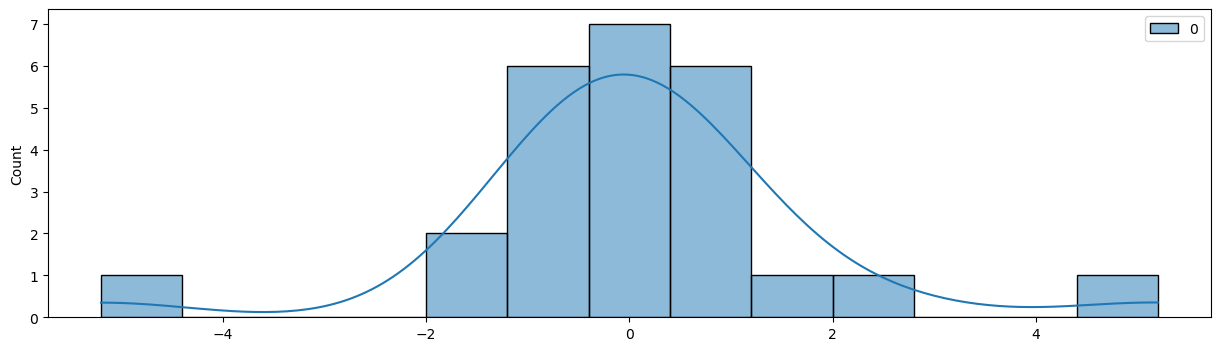

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
qt = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
X = qt.fit_transform(X)
plt.figure(figsize=(15,4))
sns.histplot(X, kde=True)

### Power Transform
```python
class sklearn.preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)
```

<Axes: ylabel='Count'>

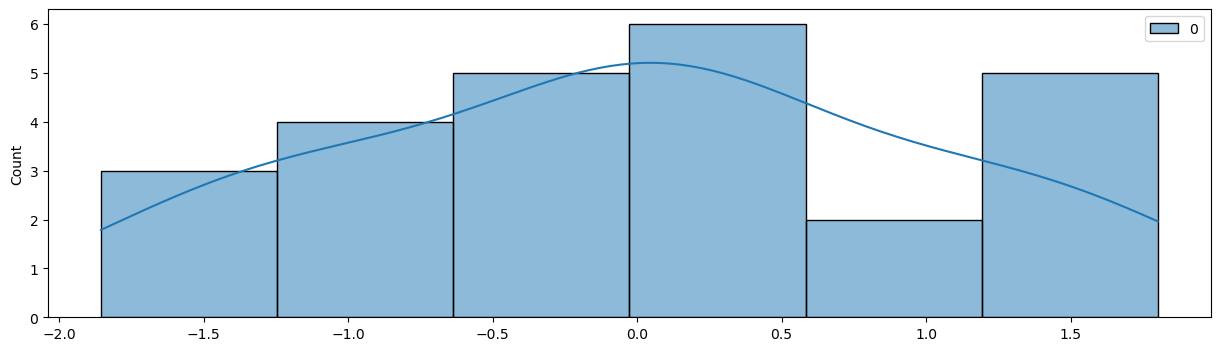

In [20]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
X = pt.fit_transform(X)
plt.figure(figsize=(15,4))
sns.histplot(X, kde=True)

<Axes: ylabel='Count'>

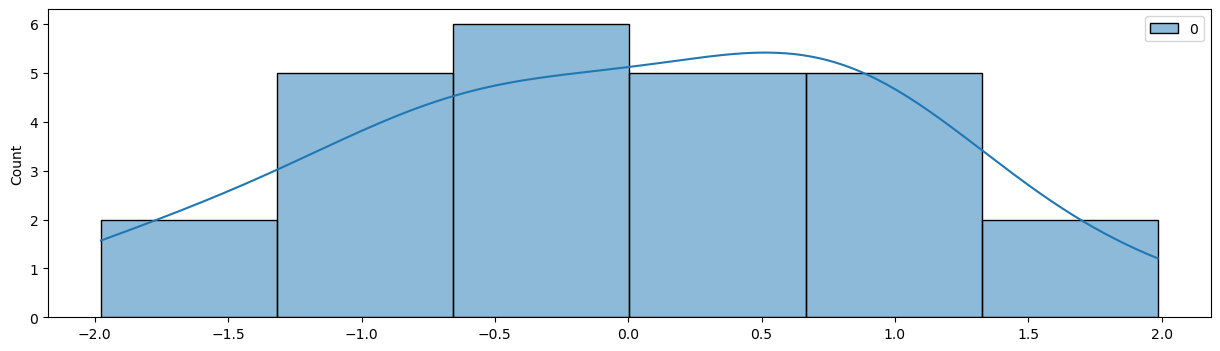

In [21]:
pt2 = PowerTransformer(method='box-cox')
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
X = pt2.fit_transform(X)
plt.figure(figsize=(15,4))
sns.histplot(X, bins='auto', kde=True)

# Optimize the Model

Após a escolha do algoritmo que melhor se adapta ao seu problema ou que apresenta melhor desempenho, é possível definir e ajustar seus hiperparâmetros para otimizar ainda mais o desempenho do modelo. Isso pode ser feito utilizando as ferramentas GridSearch ou RandomizedSearch do Scikit-Learn.

GridSearch
O GridSearch é uma técnica que permite testar várias combinações de hiperparâmetros especificados em uma grade de valores predefinidos. Ele busca exaustivamente a melhor combinação de hiperparâmetros, treinando e avaliando o modelo para cada combinação. Isso é feito através de validação cruzada, onde o conjunto de dados é dividido em partes menores para garantir que o modelo seja avaliado de forma justa e imparcial.

```python	
class sklearn.model_selection.GridSearchCV(
    estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, 
    cv=None, verbose=0, pre_dispatch='2*n_jobs',
     error_score=nan, return_train_score=False
     )
```	

In [22]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} #aqui depende do seu algoritmo usado
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5, return_train_score=True) #outro hiperparm importante é scoring='neg_mean_squared_error' para regressões e return_train_score=True para poder montar
# um df de resultados
clf.fit(iris.data, iris.target)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             return_train_score=True)

In [23]:
clf.best_estimator_

SVC(C=1, kernel='linear')

In [24]:
pd.DataFrame(clf.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')